In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize

plt.rcParams['figure.figsize'] = [12, 18]
plt.rcParams.update({'font.size': 18})

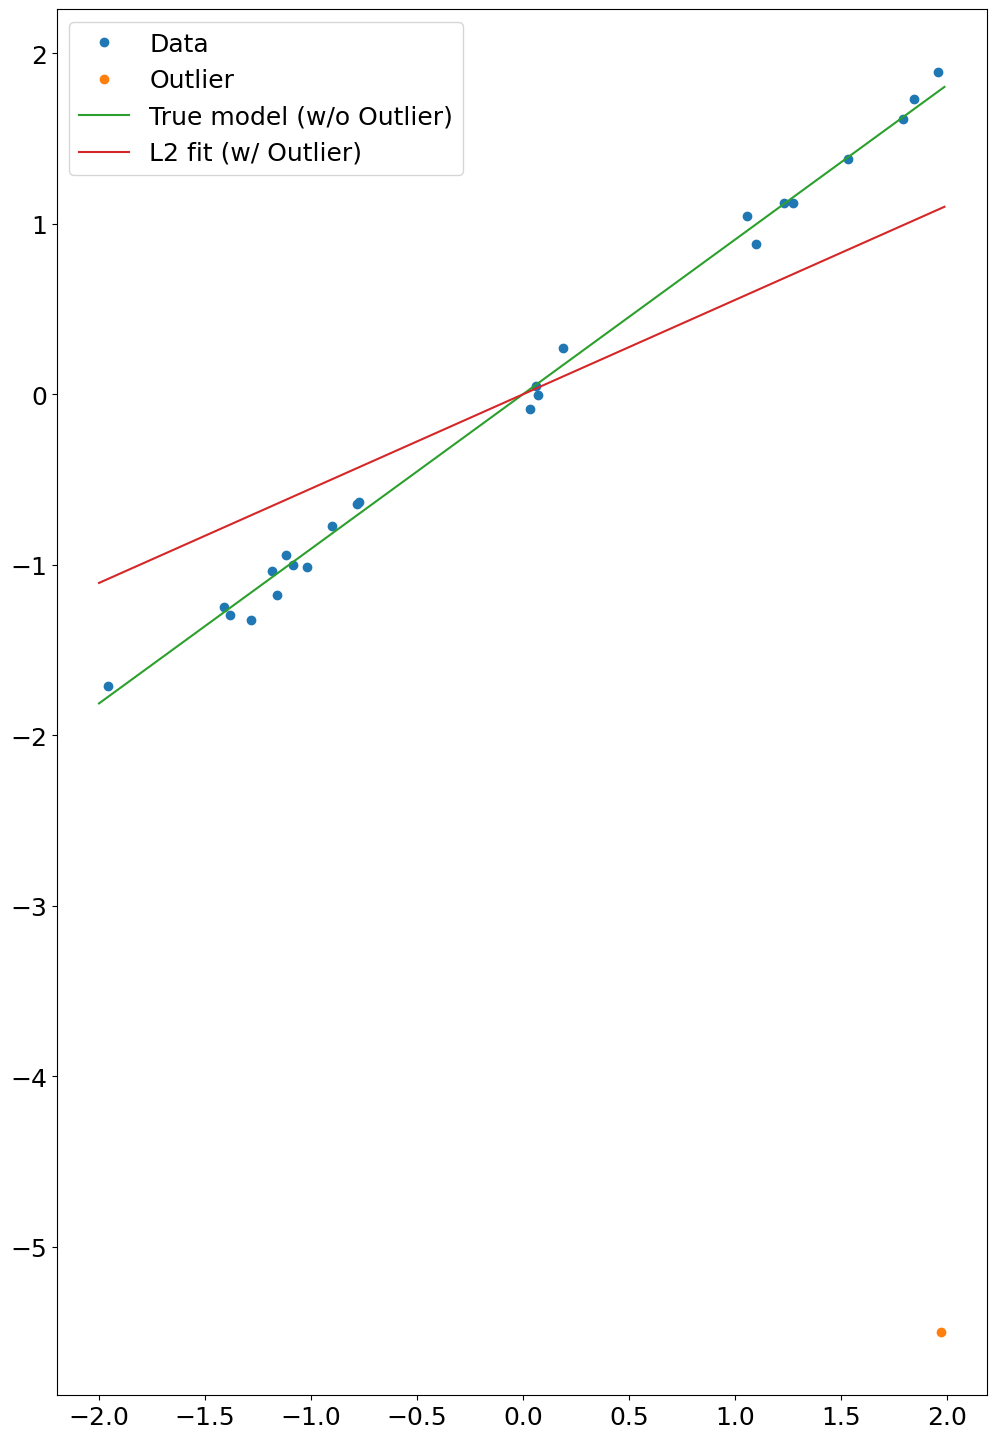

In [11]:
x = np.sort(4*(np.random.rand(25,1)-0.5), axis=0)
b = 0.9*x + 0.1*np.random.randn(len(x),1)
a_true = np.linalg.lstsq(x,b,rcond=None)[0].item(0)

b[-1] = -5.5
al2 = np.linalg.lstsq(x,b,rcond=None)[0].item(0)

plt.plot(x[:-1], b[:-1], 'o')
plt.plot(x[-1], b[-1], 'o')

xgrid = np.arange(-2,2,0.01)
plt.plot(xgrid, a_true*xgrid)
plt.plot(xgrid, al2*xgrid)
plt.legend(["Data", "Outlier", "True model (w/o Outlier)", "L2 fit (w/ Outlier)"])
plt.show()

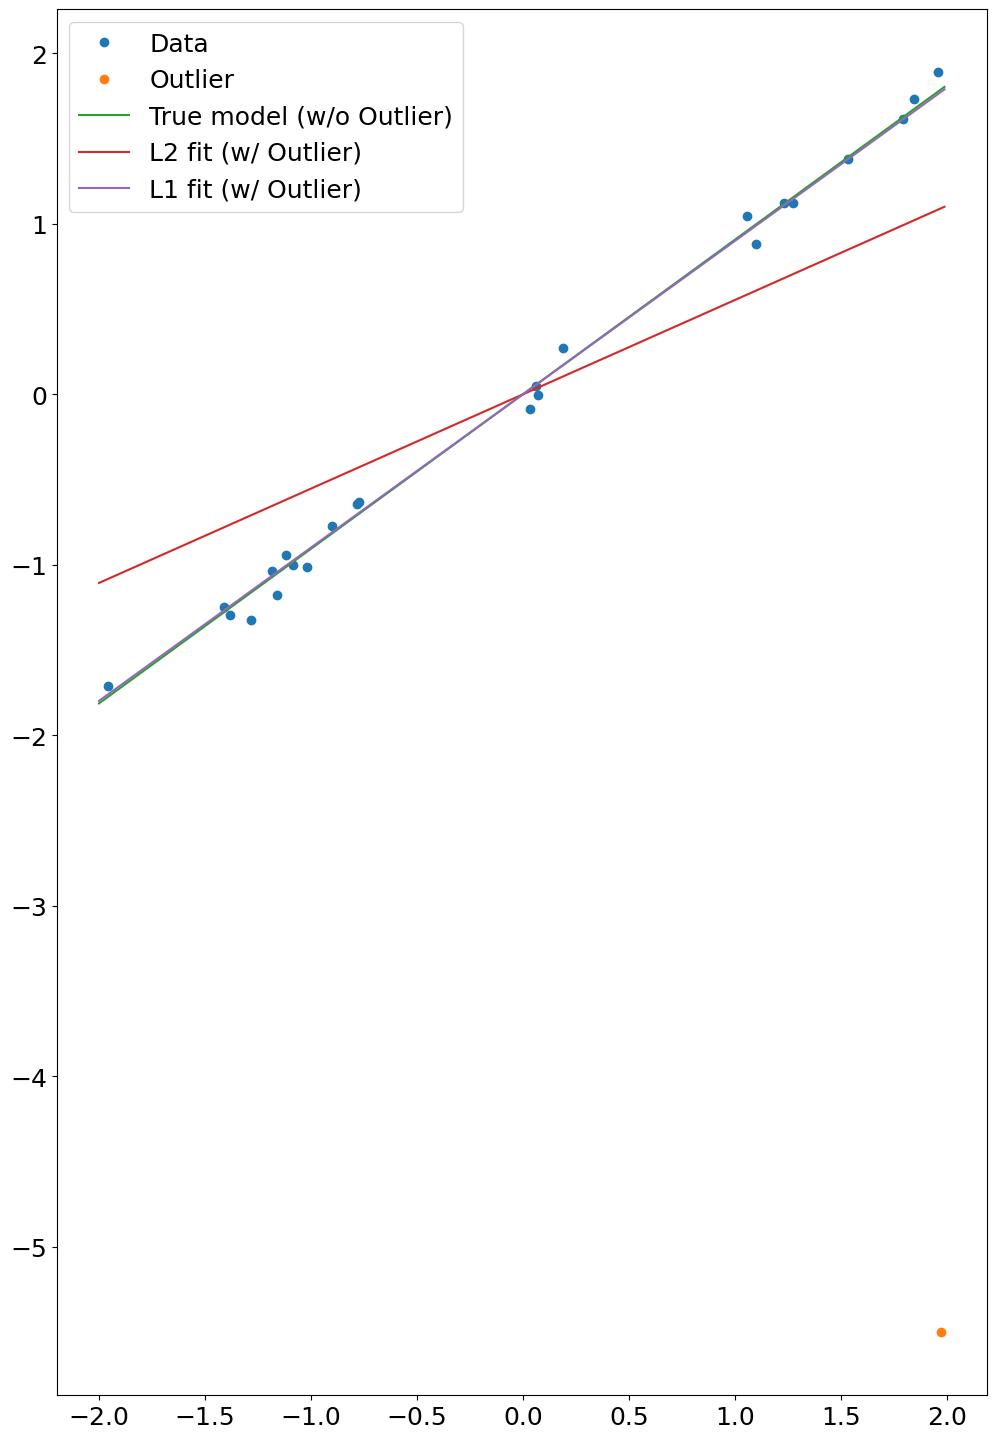

In [14]:
def l1_norm(a):
  return np.linalg.norm(a*x-b, ord=1)

a0 = al2
res = minimize(l1_norm, a0)
al1 = res.x[0]

plt.plot(x[:-1], b[:-1], 'o')
plt.plot(x[-1], b[-1], 'o')

xgrid = np.arange(-2,2,0.01)
plt.plot(xgrid, a_true*xgrid)
plt.plot(xgrid, al2*xgrid)
plt.plot(xgrid, al1*xgrid)
plt.legend(["Data", "Outlier", "True model (w/o Outlier)", "L2 fit (w/ Outlier)", "L1 fit (w/ Outlier)" ])
plt.show()

